In [7]:
# Dependencies
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from pprint import pprint
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from tqdm import tqdm_notebook
from config import gkey
import scipy.stats as stats

In [19]:
zip_data = "Project1_State_Data.csv"
zip_data_df = pd.read_csv(zip_data, dtype=str, low_memory=False)

In [20]:
zip_data_df.describe()

,State,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Total No HS Diploma,No HS Diploma Rate,Total HS Diploma,...,Total educational attainment over 25,Never Married,Never Married Rate,Married,Married Rate,Widowed,Widowed Rate,Divorced,Divorced Rate,Over 15 Marital Status
count,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
unique,52,52,40,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
top,Connecticut,4424376.0,36.3,56119.0,33315.0,1128046.0,17.710655694723958,143466,8.155319805369082,978521,...,560605.0,3646306,31.79695353745165,1979275,52.275593841333375,301048,5.879309046394268,429321,10.093614513419372,4418152.0
freq,1,1,3,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [32]:
zip_data_df.sort_values(by='Poverty Rate', ascending=False)

,State,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Total No HS Diploma,No HS Diploma Rate,Total HS Diploma,...,Total educational attainment over 25,Never Married,Never Married Rate,Married,Married Rate,Widowed,Widowed Rate,Divorced,Divorced Rate,Over 15 Marital Status
39,Puerto Rico,3468963.0,40.1,19775.0,12081.0,1543220.0,44.486494,605620,25.331365,659365,...,2390791.0,1131500,39.27046819144137,1144431,39.71925866796238,208997,7.253566098636033,396372,13.756707041960226,2881300.0
24,Mississippi,2986220.0,36.9,42009.0,22500.0,620007.0,20.762268,325278,16.628896,594140,...,1956101.0,800994,33.60120814237622,1137647,47.723595482050904,166892,7.001017272660535,278292,11.674179102912337,2383825.0
31,New Mexico,2084828.0,37.3,46718.0,25257.0,420293.0,20.159601,207487,15.017552,365014,...,1381630.0,574879,34.40763615273981,779925,46.68004158514331,101334,6.0650387331973095,214651,12.84728352891957,1670789.0
18,Louisiana,4663461.0,36.4,46710.0,26205.0,887574.0,19.032517,486085,15.720380,1046025,...,3092069.0,1320445,35.35515403493947,1723678,46.15179064378781,247896,6.637460299100193,442783,11.855595022172526,3734802.0
17,Kentucky,4424376.0,38.6,46535.0,25888.0,783586.0,17.710656,441659,14.790006,988521,...,2986199.0,1016773,28.368373445738467,1861107,51.92562980968021,237712,6.63225989334235,468586,13.073736851238973,3584178.0
3,Arkansas,2977944.0,37.9,43813.0,24426.0,524211.0,17.603118,286117,14.408366,681486,...,1985770.0,660401,27.611923449361214,1253607,52.41436720959442,165004,6.898956568567276,312712,13.07475277247709,2391724.0
0,Alabama,4850771.0,38.7,46472.0,25746.0,849699.0,17.516782,481059,14.681486,1012551,...,3276637.0,1197758,30.38944405512612,1979275,50.21804645196255,280457,7.115738163609432,483872,12.276771329301901,3941362.0
49,West Virginia,1836843.0,42.2,44061.0,24774.0,317089.0,17.262717,182074,14.074277,524710,...,1293665.0,416118,27.279074295386618,789732,51.77175200650841,118795,7.78773720656269,200766,13.16143649154228,1525411.0
2,Arizona,6809946.0,37.2,53510.0,27964.0,1128046.0,16.564683,609649,13.499233,1091339,...,4516175.0,1807995,33.10126984365282,2681012,49.08470524867123,301048,5.511669603008855,671956,12.302355304667092,5462011.0
8,District of Columbia,672391.0,33.9,77649.0,50832.0,111025.0,16.511970,46497,9.730602,84119,...,477843.0,318002,55.80118059113784,174820,30.676418358823902,25305,4.440377339949884,51757,9.082023710088368,569884.0


In [21]:
zip_data_df.columns

Index(['State', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Count', 'Poverty Rate',
       'Total No HS Diploma', 'No HS Diploma Rate', 'Total HS Diploma',
       'HS Diploma Rate', 'Total Some College', 'Some College Rate',
       'Total College Degrees', 'College Degree Rate',
       'Total educational attainment over 25', 'Never Married',
       'Never Married Rate', 'Married', 'Married Rate', 'Widowed',
       'Widowed Rate', 'Divorced', 'Divorced Rate', 'Over 15 Marital Status'],
      dtype='object')

In [22]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

0/|/| 0/? [00:00<?, ?it/s]

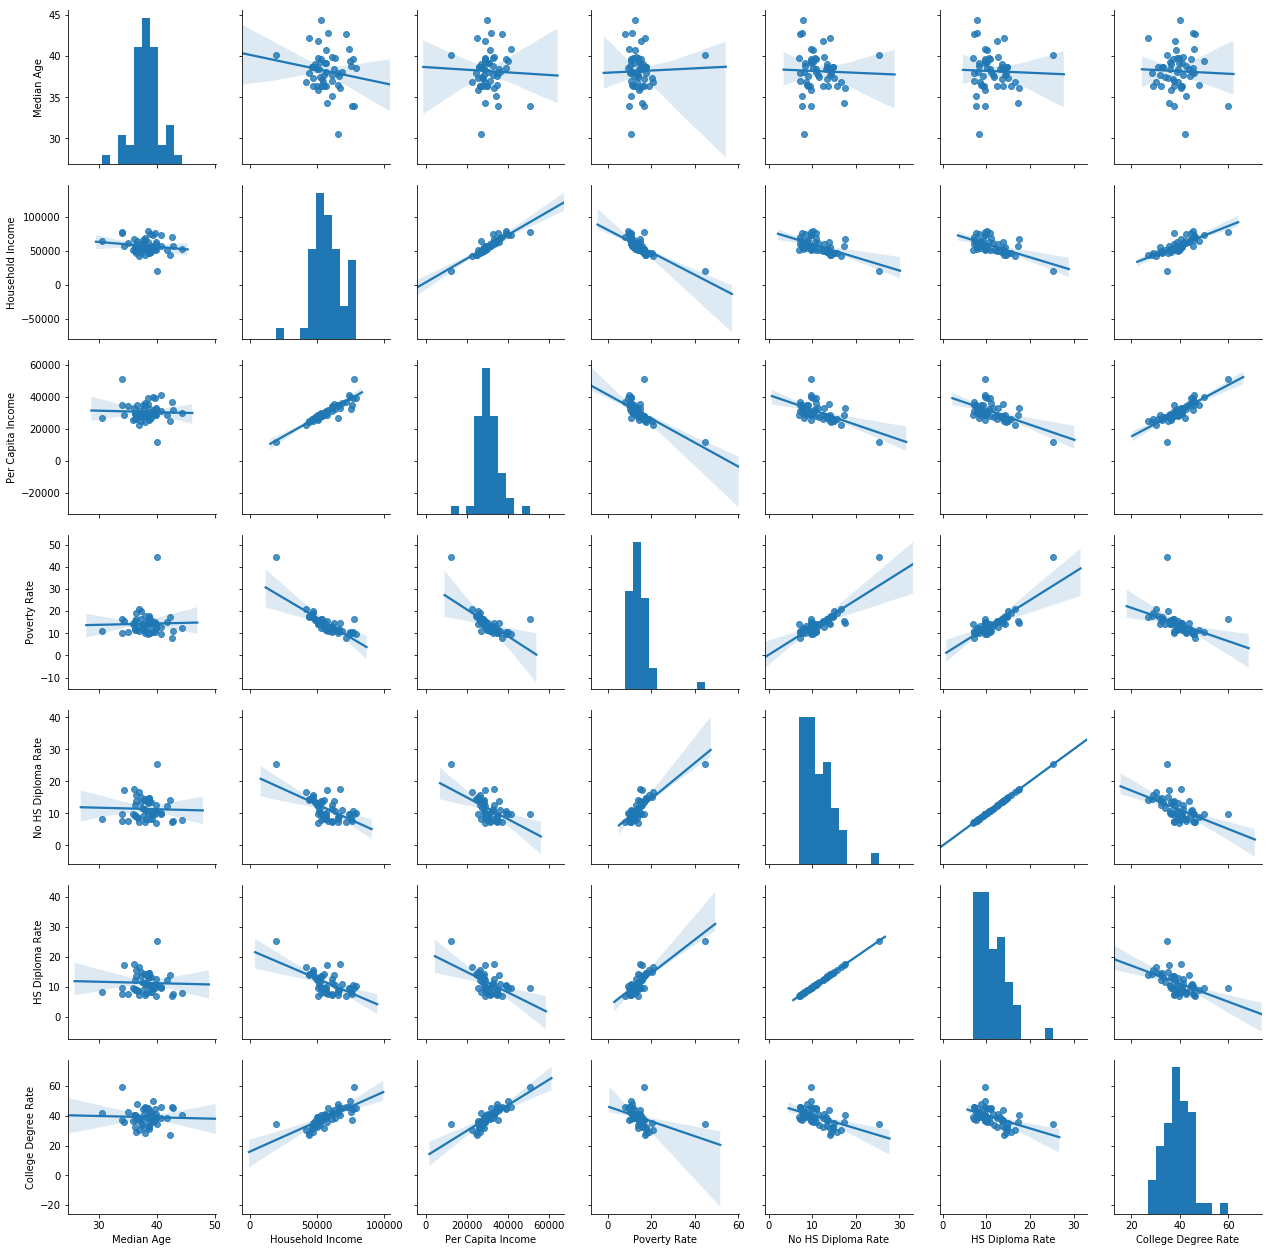

In [23]:
# household income vs total no hs diploma scatter plot

# convert columns to float for processing
zip_data_df["Median Age"] = zip_data_df["Median Age"].astype(float)
zip_data_df["Household Income"] = zip_data_df["Household Income"].astype(float)
zip_data_df["Per Capita Income"] = zip_data_df["Per Capita Income"].astype(float)
zip_data_df["Poverty Count"] = zip_data_df["Poverty Count"].astype(float)
zip_data_df["Poverty Rate"] = zip_data_df["Poverty Rate"].astype(float)
zip_data_df["No HS Diploma Rate"] = zip_data_df["No HS Diploma Rate"].astype(float)
zip_data_df["HS Diploma Rate"] = zip_data_df["No HS Diploma Rate"].astype(float)
zip_data_df["College Degree Rate"] = zip_data_df["College Degree Rate"].astype(float)

zip_data_df = zip_data_df.dropna()

# create a new df containing all numeric columns
census_data_numeric = zip_data_df[["Median Age", "Household Income", "Per Capita Income", \
                                    "Poverty Rate", "No HS Diploma Rate", 'HS Diploma Rate', 'College Degree Rate']]

# seaborn pair plot
tqdm_notebook(sns.pairplot(census_data_numeric, kind="reg"))

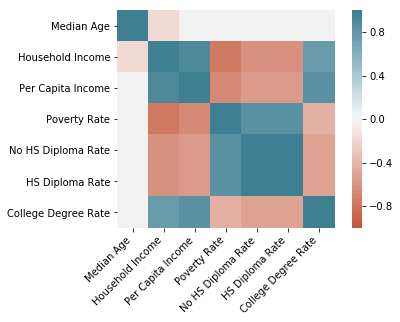

In [24]:
# heat map on correlation matrix
corr = census_data_numeric.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

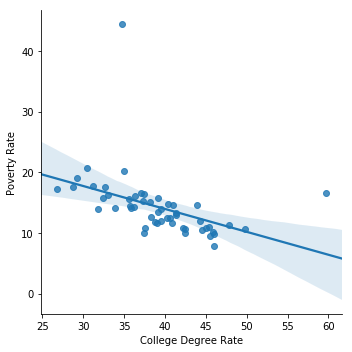

In [36]:
sns.lmplot(y='Poverty Rate', x='College Degree Rate', data=census_data_numeric)

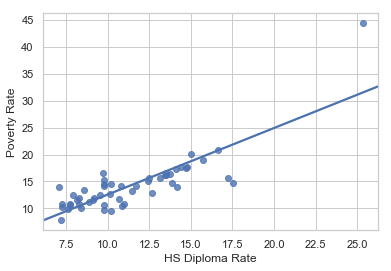

In [57]:
ax = sns.regplot(x='HS Diploma Rate', y='Poverty Rate', data=census_data_numeric, ci=0)
fig = ax.get_figure()
fig.savefig('HS Rate vs Poverty Rate') 

NameError: name 'r_value' is not defined

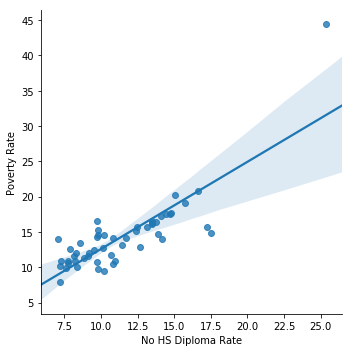

In [26]:
sns.lmplot(y='Poverty Rate', x='No HS Diploma Rate', data=census_data_numeric)

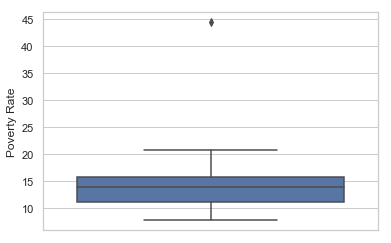

In [55]:
import seaborn as sns
#ax = sns.boxplot(y="Household Income", data=zip_data_df)
ax = sns.boxplot(y="Poverty Rate", data=zip_data_df)